# Linear Regression
## Prepared By: Md Kamrul Islam

In [1]:
###Importing Necessary Library
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf # Statsmodels - https://www.statsmodels.org/stable/index.html
from sklearn import linear_model # ScikitLearn - https://scikit-learn.org/ 
import matplotlib.pyplot as plt

In [2]:
### importing data
df = pd.read_csv("C:\\Users\\msi\Desktop\\Programming\\Linear Modeling\\LinearModeling.csv")
df.head()

,x,y
0,0.86,2.49
1,0.09,0.83
2,-0.85,-0.25
3,0.87,3.10
4,-0.44,0.87


In [3]:
### Using statsmodels.formula.api for running regression
model = smf.ols('y ~ x', data=df)
results = model.fit()
results.summary()

C:\Users\msi\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     43.82
Date:                Sun, 07 Nov 2021   Prob (F-statistic):           0.000166
Time:                        16:37:22   Log-Likelihood:                -6.7092
No. Observations:                  10   AIC:                             17.42
Df Residuals:                       8   BIC:                             18.02
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0588      0.171      6.202      0.000       0.665       1.452
x              1.6102      0.243      6.620      0.000       1.049       2.171
==============================================================================
Omnibus:                        0.266   Durbin-Watson:                   1.383
Prob(Omnibus):                  0.875   Jarque-Bera (JB):                0.404
Skew:                          -0.242   Prob(JB):                        0.817
Kurtosis:                       2.143   Cond. No.                         1.51
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
### Seperating the intercept and estimate(coefficent) of varialbe
results.params

Intercept    1.058813
x            1.610168
dtype: float64

Text(0.5, 1.0, 'Predicted trend line over scatter plot')

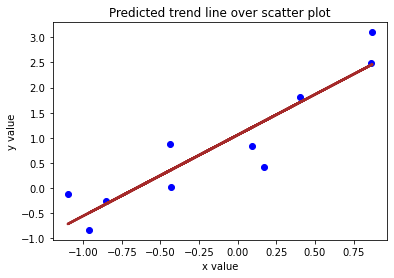

In [5]:
## Plotting predicted value with scatter plotting of data
yPredicted = results.predict(df['x'])
plt.scatter(df['x'], df['y'],color='blue')
plt.plot(df['x'], yPredicted, color='brown', linewidth=2.5)
plt.xlabel('x value')
plt.ylabel('y value')
plt.title("Predicted trend line over scatter plot")

Text(0.5, 1.0, 'Regression trendline')

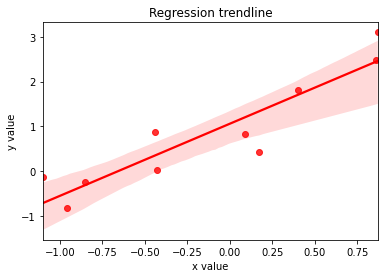

In [6]:
### Plotting as scatter plot and uing terndline to see the regression line
sns.regplot(x="x", y="y", data=df, color = "red")
plt.xlabel('x value')
plt.ylabel('y value')
plt.title("Regression trendline")

In [7]:
## Using sklearn for linear regression
lm = linear_model.LinearRegression()
## Reshaping the x value of the data to match with the 
X = df['x'].values.reshape(-1, 1)
y = df['y']
model = lm.fit(X,y)
predictions = model.predict(X)
## R-squared value
r_sq = model.score(X, y)
print('R squared:', r_sq )
### Intercept
print('Intercept:', model.intercept_)
### Slope of the variables
print('Estimate or co-efficent of variable:', model.coef_)

R squared: 0.8456217909526552
Intercept: 1.0588134099884003
Estimate or co-efficent of variable: [1.61016842]


In [8]:
### Rounding the value up to the five precisions value
r_sq = np.round(r_sq,5)
intercept = np.round(model.intercept_, 5)
coeff= np.round(model.coef_, 5)
print('R squared:', r_sq, "\n",'Intercept:', intercept,"\n", "Estimate:", coeff )

R squared: 0.84562 
 Intercept: 1.05881 
 Estimate: [1.61017]


Text(0.5, 1.0, 'Predicted trend line over scatter plot')

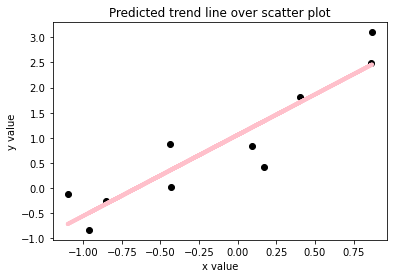

In [9]:
### Plotting the prediced y value with scatterplot of actual y value and x value
plt.scatter(df['x'], df['y'],  color='black')
plt.plot(df['x'], predictions, color='pink', linewidth=4)
plt.xlabel('x value')
plt.ylabel('y value')
plt.title("Predicted trend line over scatter plot")

In [10]:
### Finding t-value, standard error and p value of the model
# For this we need stats library
from scipy import stats
params = np.append(model.intercept_,lm.coef_)
newX = np.append(np.ones((len(X),1)), X, axis=1)
MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))
var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX[0])))) for i in ts_b]
### Showing Summary of the model 
summary = pd.DataFrame()
summary["Coefficients"],summary["Standard Errors"],summary["t value"],summary["P-value"] = [params,sd_b,ts_b,p_values]
print("R-squared:", r_sq,"\n", summary)


R-squared: 0.84562 
    Coefficients  Standard Errors   t value   P-value
0      1.058813         0.170719  6.202069  0.000259
1      1.610168         0.243238  6.619727  0.000166
